# Used Cars Dataset
## Biel Altimira

### 1.Utilitats

In [121]:
# Importem les llibreries que necesitem

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Carreguem les dades en un dataframe de pandas

fitxer = ("vehicles.csv")
data = pd.read_csv(fitxer)

In [3]:
# Opcions pel display de dataframes

pd.set_option("max_columns", None)

### 2. Neteja de les dades


In [4]:
data.tail()

id                                                url  \
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

         region                      region_url  price    year manufacturer  \
426875  wyoming  https://wyoming.craigslist.org  23590  2019.0       nissan   
426876  wyoming  https://wyoming.craigslist.org  30590  2020.0        volvo   
426877  wyoming  https://wyoming.craigslist.org  34990  2020.0     cadillac   
426878  wyoming  https://wyoming.craigslist.org  28990  2018.0        lexus   
426879  wyoming  https://wyoming.craigslist.org  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color                                          image_url  \
426875         NaN  https://images.craigslist.org/00o0o_iiraFnHg8q...   
426876         red  https://images.craigslist.org/00x0x_15sbgnxCIS...   
426877       white  https://images.craigslist.org/00L0L_farM7bxnxR...   
426878      silver  https://images.craigslist.org/00z0z_bKnIVGLkDT...   
426879         NaN  https://images.craigslist.org/00Y0Y_lEUocjyRxa...   

                                              description  county state  \
426875  Carvana is the safer way to buy a car During t...     NaN    wy   
426876  Carvana is the safer way to buy a car During t...     NaN    wy   
426877  Carvana is the safer way to buy a car During t...     NaN    wy   
426878  Carvana is the safer way to buy a car During t...     NaN    wy   
426879  Carvana is the safer way to buy a car During t...     NaN    wy   

              lat       long              posting_date  
426875  33.786500 -84.445400  2021-04-04T03:21:31-0600  
426876  33.786500 -84.445400  2021-04-04T03:21:29-0600  
426877  33.779214 -84.411811  2021-04-04T03:21:17-0600  
426878  33.786500 -84.445400  2021-04-04T03:21:11-0600  
426879  33.779214 -84.411811  2021-04-04T03:21:07-0600

In [5]:
data.describe()

id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.885502

In [6]:
data.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

<AxesSubplot:>

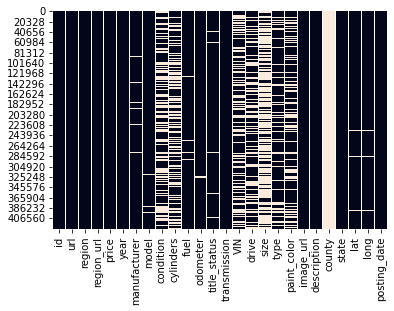

In [7]:
sns.heatmap(data.isnull(), cbar=False)

<AxesSubplot:>

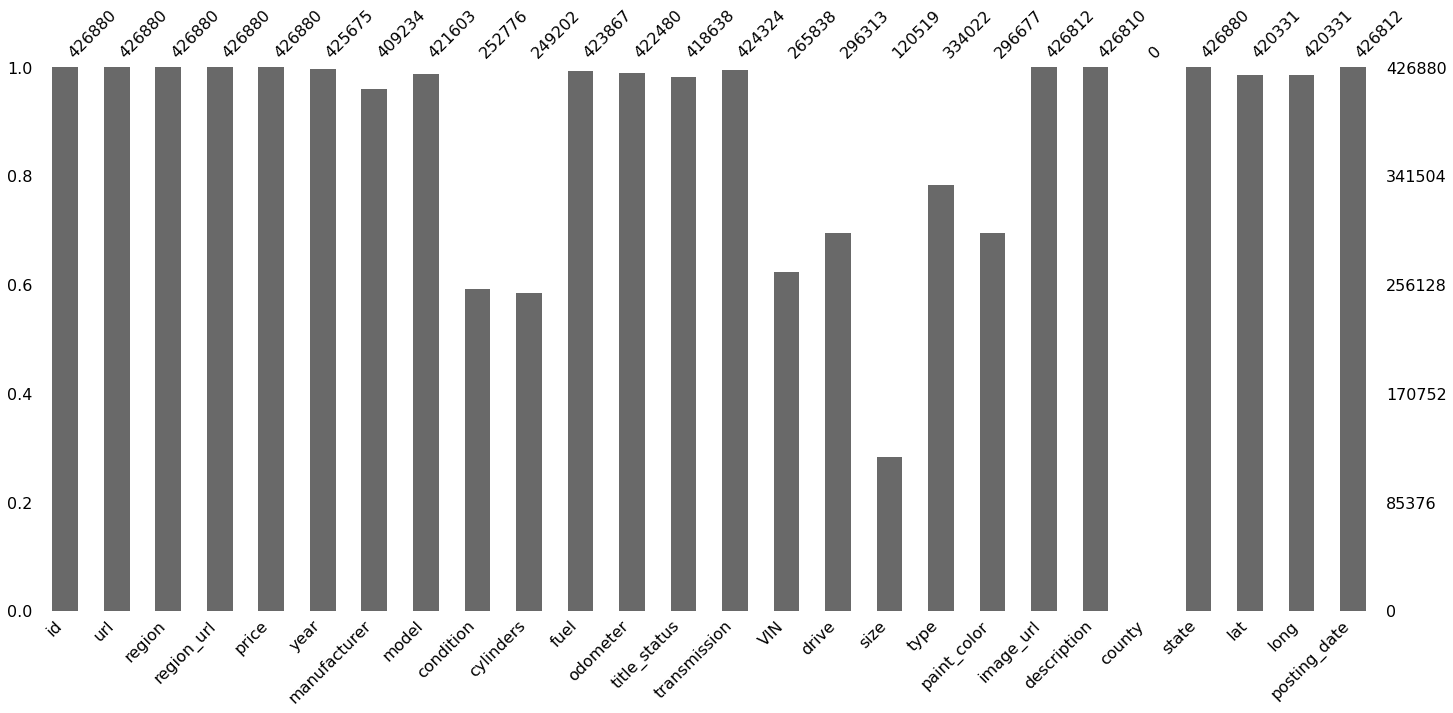

In [8]:
msno.bar(data)

In [9]:
percent_nan = data.isnull().sum() * 100 / len(data)
nan_df = pd.DataFrame({'columna': data.columns,
                                 'percent_nan': percent_nan})

In [10]:
nan_df.head(30)

columna  percent_nan
id                      id     0.000000
url                    url     0.000000
region              region     0.000000
region_url      region_url     0.000000
price                price     0.000000
year                  year     0.282281
manufacturer  manufacturer     4.133714
model                model     1.236179
condition        condition    40.785232
cylinders        cylinders    41.622470
fuel                  fuel     0.705819
odometer          odometer     1.030735
title_status  title_status     1.930753
transmission  transmission     0.598763
VIN                    VIN    37.725356
drive                drive    30.586347
size                  size    71.767476
type                  type    21.752717
paint_color    paint_color    30.501078
image_url        image_url     0.015930
description    description     0.016398
county              county   100.000000
state                state     0.000000
lat                    lat     1.534155
long                  long     1.534155
posting_date  posting_date     0.015930

#### 2.1 Eliminem totes les files amb valors NaN (Variant 1)

In [11]:
# Eliminem columnes sense utilitat
data = data.drop(["id", "url", "region", "region_url", "image_url", "county", "state", "size"], axis=1)
data.drop_duplicates(inplace=True)

In [12]:
# Creem una copia de les dades i borrem totes les files amb valors NaN i les columnes amb un excés d'ells.

variant_1 = data.copy()
variant_1 = variant_1.drop(["cylinders", "VIN", "drive", "paint_color"], axis=1)
#variant_1["condition"].fillna(variant_1["condition"].mode()[0], inplace=True)
variant_1.dropna(axis = 0, inplace=True)

In [13]:
variant_1.head()

price    year manufacturer                     model  condition fuel  \
27  33590  2014.0          gmc  sierra 1500 crew cab slt       good  gas   
28  22590  2010.0    chevrolet            silverado 1500       good  gas   
29  39590  2020.0    chevrolet       silverado 1500 crew       good  gas   
30  30990  2017.0       toyota      tundra double cab sr       good  gas   
31  15000  2013.0         ford                 f-150 xlt  excellent  gas   

    odometer title_status transmission    type  \
27   57923.0        clean        other  pickup   
28   71229.0        clean        other  pickup   
29   19160.0        clean        other  pickup   
30   41124.0        clean        other  pickup   
31  128000.0        clean    automatic   truck   

                                          description     lat     long  \
27  Carvana is the safer way to buy a car During t...  32.590 -85.4800   
28  Carvana is the safer way to buy a car During t...  32.590 -85.4800   
29  Carvana is the safer way to buy a car During t...  32.590 -85.4800   
30  Carvana is the safer way to buy a car During t...  32.590 -85.4800   
31  2013 F-150 XLT V6 4 Door. Good condition. Leve...  32.592 -85.5189   

                posting_date  
27  2021-05-04T12:31:18-0500  
28  2021-05-04T12:31:08-0500  
29  2021-05-04T12:31:25-0500  
30  2021-05-04T10:41:31-0500  
31  2021-05-03T14:02:03-0500

In [14]:
variant_1.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
description     0
lat             0
long            0
posting_date    0
dtype: int64

In [15]:
variant_1.shape

(202183, 14)

#### 2.2 Insertem modes i mitjanes (Variant 2)

In [16]:
# Copiem el dataframe

variant_2 = data.copy()

In [17]:
# Creem un datafram amb totes les columnes que contenen un valor NaN

nulls = variant_2[variant_2.isnull().any(axis=1)]
nulls.head(2000)

price    year   manufacturer                         model  condition  \
0      6000     NaN            NaN                           NaN        NaN   
1     11900     NaN            NaN                           NaN        NaN   
2     21000     NaN            NaN                           NaN        NaN   
3      1500     NaN            NaN                           NaN        NaN   
4      4900     NaN            NaN                           NaN        NaN   
...     ...     ...            ...                           ...        ...   
2354  24590  2017.0      chevrolet        silverado 1500 regular       good   
2355   8000  2002.0           ford                         f-150       good   
2356   3200  2008.0  mercedes-benz                     benz c300       good   
2357  24590  2013.0            gmc  sierra 1500 extended cab slt       good   
2360      0  2020.0          dodge                       charger  excellent   

        cylinders   fuel  odometer title_status transmission  \
0             NaN    NaN       NaN          NaN          NaN   
1             NaN    NaN       NaN          NaN          NaN   
2             NaN    NaN       NaN          NaN          NaN   
3             NaN    NaN       NaN          NaN          NaN   
4             NaN    NaN       NaN          NaN          NaN   
...           ...    ...       ...          ...          ...   
2354  6 cylinders    gas   40784.0        clean        other   
2355  8 cylinders    gas  219000.0        clean    automatic   
2356          NaN    gas  118000.0        clean    automatic   
2357  8 cylinders  other   80318.0        clean        other   
2360  8 cylinders    gas    8428.0        clean    automatic   

                    VIN drive    type paint_color  \
0                   NaN   NaN     NaN         NaN   
1                   NaN   NaN     NaN         NaN   
2                   NaN   NaN     NaN         NaN   
3                   NaN   NaN     NaN         NaN   
4                   NaN   NaN     NaN         NaN   
...                 ...   ...     ...         ...   
2354  1GCNCNEH7HZ118773   NaN  pickup       white   
2355                NaN   4wd   truck        blue   
2356                NaN   NaN   sedan         NaN   
2357  1GTR1WE07DZ143724   NaN  pickup         NaN   
2360  2C3CDXGJ8LH129343   rwd   sedan         NaN   

                                            description        lat       long  \
0                                                   NaN        NaN        NaN   
1                                                   NaN        NaN        NaN   
2                                                   NaN        NaN        NaN   
3                                                   NaN        NaN        NaN   
4                                                   NaN        NaN        NaN   
...                                                 ...        ...        ...   
2354  Carvana is the safer way to buy a car During t...  34.010000 -86.010000   
2355  Hello I am selling my 2002 blue F150 4x4 5.4 w...  34.191100 -85.770500   
2356  Mercedes-Benz C 300 Sedan 2008  Black Interior...  34.014790 -85.999432   
2357  Carvana is the safer way to buy a car During t...  34.010000 -86.010000   
2360  2020 Dodge Charger  by Benton Nissan of Oxford...  33.614088 -85.796729   

                  posting_date  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
2354  2021-04-28T13:11:11-0500  
2355  2021-04-27T20:36:05-0500  
2356  2021-04-27T14:25:13-0500  
2357  2021-04-27T12:21:53-0500  
2360  2021-04-27T11:01:26-0500  

[2000 rows x 18 columns]

In [18]:
# Insertem modes i mitjanes

In [19]:
variant_2["condition"].fillna(variant_2["condition"].mode()[0], inplace=True)

In [20]:
variant_2["cylinders"].fillna(variant_2["cylinders"].mode()[0], inplace=True)

In [21]:
variant_2["drive"].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [22]:
variant_2["drive"].fillna(variant_2["drive"].mode()[0], inplace=True)

In [23]:
variant_2["type"].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [24]:
variant_2["type"].fillna(variant_2["type"].mode()[0], inplace=True)

In [25]:
variant_2["paint_color"].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [26]:
variant_2["paint_color"].fillna(variant_2["paint_color"].mode()[0], inplace=True)

In [27]:
#Eliminem les poques files restants

variant_2.dropna(axis = 0, inplace=True)

In [28]:
variant_2.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
description     0
lat             0
long            0
posting_date    0
dtype: int64

In [29]:
variant_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241710 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         241710 non-null  int64  
 1   year          241710 non-null  float64
 2   manufacturer  241710 non-null  object 
 3   model         241710 non-null  object 
 4   condition     241710 non-null  object 
 5   cylinders     241710 non-null  object 
 6   fuel          241710 non-null  object 
 7   odometer      241710 non-null  float64
 8   title_status  241710 non-null  object 
 9   transmission  241710 non-null  object 
 10  VIN           241710 non-null  object 
 11  drive         241710 non-null  object 
 12  type          241710 non-null  object 
 13  paint_color   241710 non-null  object 
 14  description   241710 non-null  object 
 15  lat           241710 non-null  float64
 16  long          241710 non-null  float64
 17  posting_date  241710 non-null  object 
dtypes: 

In [30]:
variant_2.shape

(241710, 18)

### 3. Exploratory Data Analysis (Exploració de les dades)

In [31]:
data = pd.concat([variant_1.assign(ind="v1"), variant_2.assign(ind="v2")])
data.head()
data.reset_index(inplace=True)
data = data.drop("index", axis=1)

data.year = data.year.astype(int)


variant_1 = data[data["ind"] == "v1"]
variant_2 = data[data["ind"] == "v2"]

variant_2["cylinders"] = variant_2["cylinders"].apply(lambda x : x.split(" ")[0])
variant_2 = variant_2[variant_2.cylinders != "other"]
variant_2.cylinders = variant_2.cylinders.astype(int)

/tmp/ipykernel_10651/2051400471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variant_2["cylinders"] = variant_2["cylinders"].apply(lambda x : x.split(" ")[0])


In [32]:
variant_2.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'fuel',
       'odometer', 'title_status', 'transmission', 'type', 'description',
       'lat', 'long', 'posting_date', 'ind', 'cylinders', 'VIN', 'drive',
       'paint_color'],
      dtype='object')

In [33]:
variant_2.head()

price  year manufacturer                        model condition fuel  \
202183  33590  2014          gmc     sierra 1500 crew cab slt      good  gas   
202184  22590  2010    chevrolet               silverado 1500      good  gas   
202185  39590  2020    chevrolet          silverado 1500 crew      good  gas   
202186  30990  2017       toyota         tundra double cab sr      good  gas   
202187  27990  2012          gmc  sierra 2500 hd extended cab      good  gas   

        odometer title_status transmission    type  \
202183   57923.0        clean        other  pickup   
202184   71229.0        clean        other  pickup   
202185   19160.0        clean        other  pickup   
202186   41124.0        clean        other  pickup   
202187   68696.0        clean        other  pickup   

                                              description    lat   long  \
202183  Carvana is the safer way to buy a car During t...  32.59 -85.48   
202184  Carvana is the safer way to buy a car During t...  32.59 -85.48   
202185  Carvana is the safer way to buy a car During t...  32.59 -85.48   
202186  Carvana is the safer way to buy a car During t...  32.59 -85.48   
202187  Carvana is the safer way to buy a car During t...  32.59 -85.48   

                    posting_date ind  cylinders                VIN drive  \
202183  2021-05-04T12:31:18-0500  v2          8  3GTP1VEC4EG551563   4wd   
202184  2021-05-04T12:31:08-0500  v2          8  1GCSCSE06AZ123805   4wd   
202185  2021-05-04T12:31:25-0500  v2          8  3GCPWCED5LG130317   4wd   
202186  2021-05-04T10:41:31-0500  v2          8  5TFRM5F17HX120972   4wd   
202187  2021-05-03T13:41:25-0500  v2          8  1GT220CG8CZ231238   4wd   

       paint_color  
202183       white  
202184        blue  
202185         red  
202186         red  
202187       black

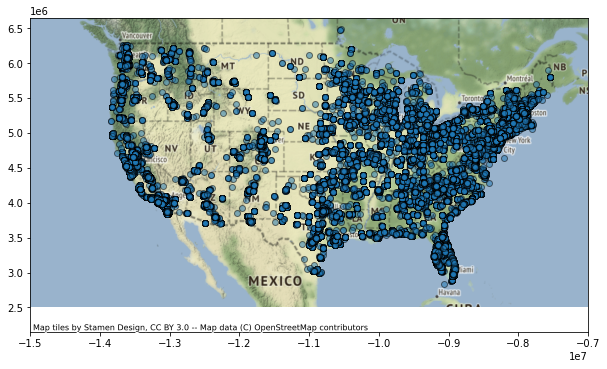

In [34]:
gdf = gpd.GeoDataFrame(variant_2, geometry=gpd.points_from_xy(variant_2.long, variant_2.lat))

gdf = gdf[(22<gdf.lat) & (gdf.lat<65) & (-144<gdf.long) & (gdf.long<-56)]
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=3857)

ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=4)
plt.xlim(-1.5e7,-0.7e7)
plt.ylim(2.15e6,6.65e6)
plt.show()

<AxesSubplot:>

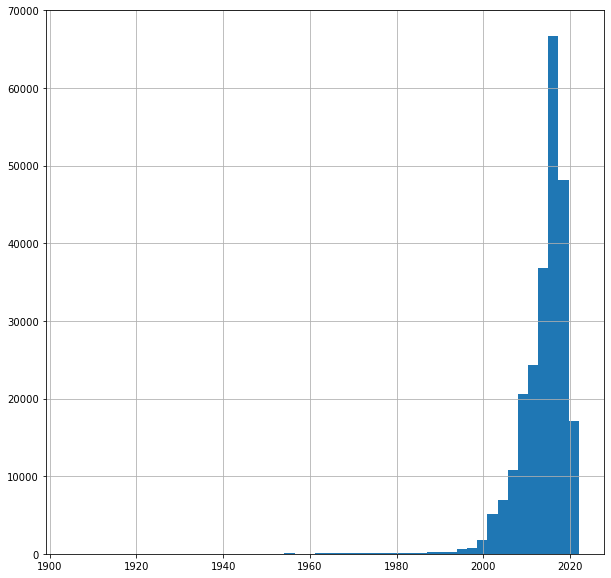

In [35]:
variant_2.year.hist(bins=50, figsize=(10,10))

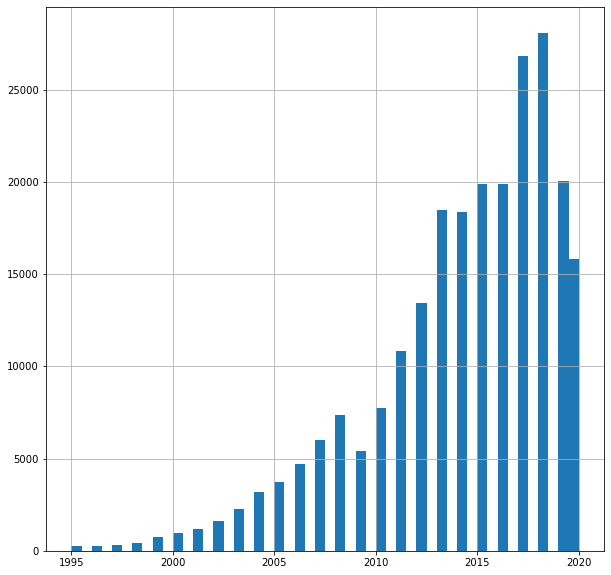

In [36]:
any_ = variant_2[(variant_2.year >=1995) & (variant_2.year <=2020)]
any_.year.hist(bins=50, figsize=(10,10))
plt.show()

<AxesSubplot:>

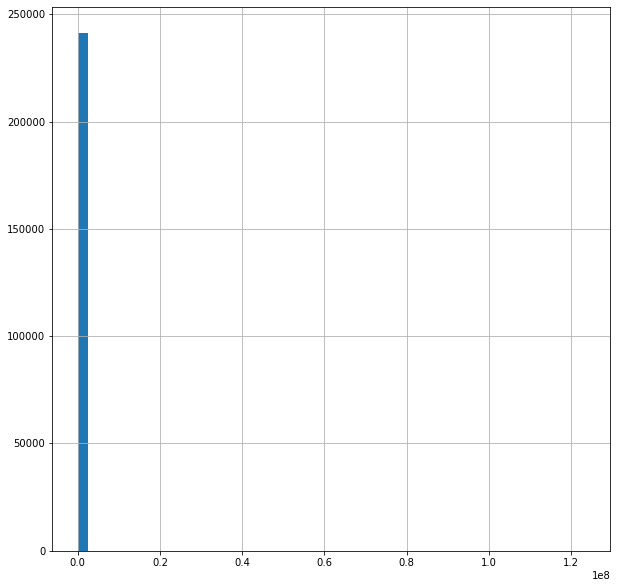

In [37]:
variant_2.price.hist(bins=50, figsize=(10,10))

<AxesSubplot:>

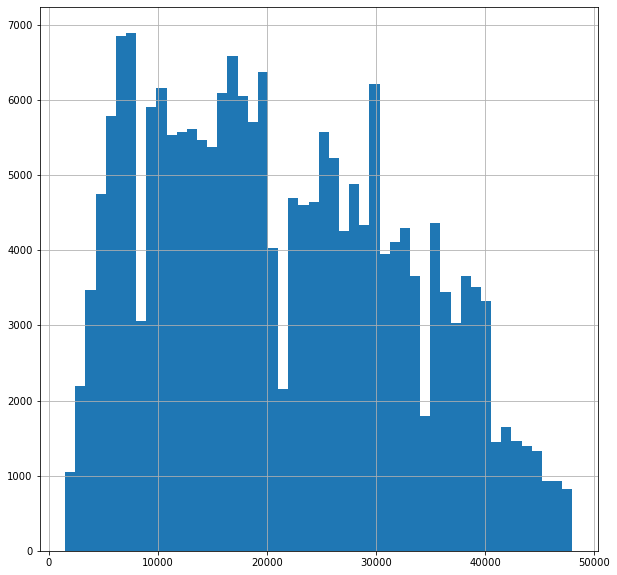

In [38]:
price = variant_2[(variant_2.price >=1500) & (variant_2.price <=48000)]
price.price.hist(bins=50, figsize=(10,10))

<AxesSubplot:>

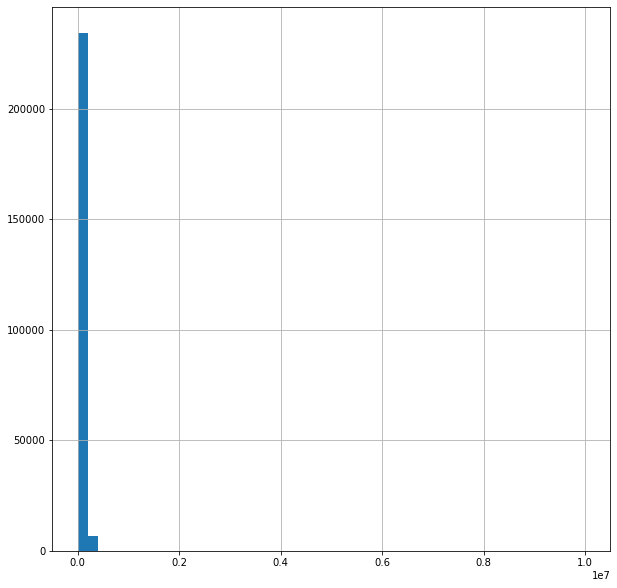

In [39]:
variant_2.odometer.hist(bins=50, figsize=(10,10))

<AxesSubplot:>

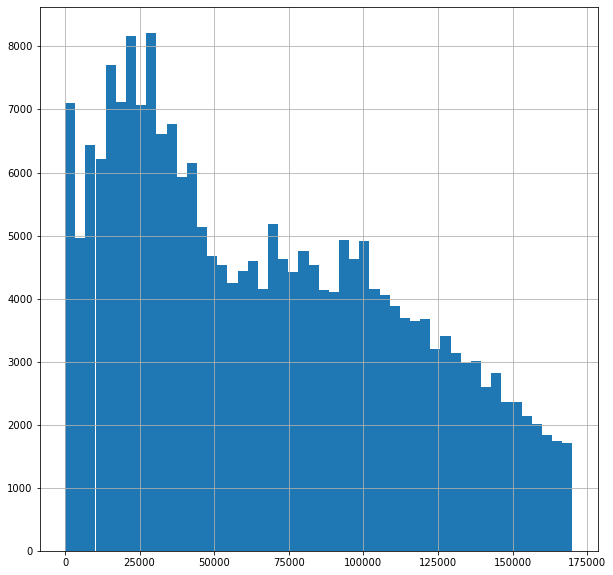

In [77]:
quilometratge = variant_2[(variant_2.odometer >=0) & (variant_2.odometer <=170000)]
quilometratge.odometer.hist(bins=50, figsize=(10,10))

In [41]:
def pie_plot(df, columna):
    valors = pd.DataFrame(pd.value_counts(getattr(df, columna)))
    figura = px.pie(valors, values=columna, names = valors.index, title=columna)
    figura.show()

In [42]:
llista_pie = ["manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive","paint_color", "type"]

for columna in llista_pie:
    pie_plot(variant_2, columna)

In [43]:
top_models = pd.DataFrame(pd.value_counts(variant_2.model))
top_models["%"] = top_models["model"].apply(lambda x : (x / variant_2.shape[0]) * 100 )
top_models.head()

model         %
f-150            5252  2.177076
silverado 1500   2962  1.227818
1500             2711  1.123772
escape           1706  0.707177
camry            1605  0.665310

In [44]:
# line plots


In [45]:
coefficient_corr = variant_2.corr()
print(coefficient_corr["price"].sort_values(ascending=False))

price        1.000000
year         0.022595
cylinders    0.016103
long         0.000430
lat          0.000369
odometer    -0.020547
Name: price, dtype: float64


### 3. Data engeneering

In [56]:


data = pd.concat([variant_1.assign(ind="v1"), variant_2.assign(ind="v2")])
data = data.drop(["lat", "long"], axis=1)
data.head()



price  year manufacturer                     model  condition fuel  \
0  33590  2014          gmc  sierra 1500 crew cab slt       good  gas   
1  22590  2010    chevrolet            silverado 1500       good  gas   
2  39590  2020    chevrolet       silverado 1500 crew       good  gas   
3  30990  2017       toyota      tundra double cab sr       good  gas   
4  15000  2013         ford                 f-150 xlt  excellent  gas   

   odometer title_status transmission    type  \
0   57923.0        clean        other  pickup   
1   71229.0        clean        other  pickup   
2   19160.0        clean        other  pickup   
3   41124.0        clean        other  pickup   
4  128000.0        clean    automatic   truck   

                                         description  \
0  Carvana is the safer way to buy a car During t...   
1  Carvana is the safer way to buy a car During t...   
2  Carvana is the safer way to buy a car During t...   
3  Carvana is the safer way to buy a car During t...   
4  2013 F-150 XLT V6 4 Door. Good condition. Leve...   

               posting_date ind cylinders  VIN drive paint_color geometry  
0  2021-05-04T12:31:18-0500  v1       NaN  NaN   NaN         NaN     None  
1  2021-05-04T12:31:08-0500  v1       NaN  NaN   NaN         NaN     None  
2  2021-05-04T12:31:25-0500  v1       NaN  NaN   NaN         NaN     None  
3  2021-05-04T10:41:31-0500  v1       NaN  NaN   NaN         NaN     None  
4  2021-05-03T14:02:03-0500  v1       NaN  NaN   NaN         NaN     None

In [57]:
condition = {"excellent" : 6, "good" : 5, "like new" : 4, "new" : 3, "fair" : 2, "salvage" : 1}

data["condition"] = data["condition"].map(condition)

In [78]:
data = data[(data["fuel"] != 'other')]
data = data[(data["transmission"] != 'other')]

In [84]:
data["posting_date"] = data["posting_date"].apply(lambda x : x.split("-")[0])
data.posting_date = data.posting_date.astype(int)
data['edat'] = data.apply(lambda fila: fila.posting_date - fila.year, axis=1)  



price  year manufacturer            model  condition    fuel  odometer  \
4   15000  2013         ford        f-150 xlt          6     gas  128000.0   
7   35000  2019       toyota           tacoma          6     gas   43000.0   
18      0  2011         jeep          compass          6     gas   99615.0   
27  19900  2004         ford  f250 super duty          5  diesel   88000.0   
31  14000  2012        honda          odyssey          6     gas   95000.0   

   title_status transmission      type  \
4         clean    automatic     truck   
7         clean    automatic     truck   
18        clean    automatic       SUV   
27        clean    automatic    pickup   
31        clean    automatic  mini-van   

                                          description  posting_date ind  \
4   2013 F-150 XLT V6 4 Door. Good condition. Leve...          2021  v1   
7   Selling my 2019 Toyota Tacoma TRD Off Road Dou...          2021  v1   
18  Call or text now 800-213-0336 Open 9:00-6:00pm...          2021  v1   
27  Here I have a unmolested Ford F-250 6.0 power ...          2021  v1   
31  Readily available. Excellent condition, clean ...          2021  v1   

   cylinders  VIN drive paint_color geometry  edat  
4        NaN  NaN   NaN         NaN     None     8  
7        NaN  NaN   NaN         NaN     None     2  
18       NaN  NaN   NaN         NaN     None    10  
27       NaN  NaN   NaN         NaN     None    17  
31       NaN  NaN   NaN         NaN     None     9

In [110]:
 data = pd.get_dummies(data,columns=["fuel", "title_status", "transmission"])

KeyError: "None of [Index(['fuel', 'title_status', 'transmission'], dtype='object')] are in the [columns]"

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'odometer'}>],
       [<AxesSubplot:title={'center':'posting_date'}>,
        <AxesSubplot:title={'center':'edat'}>,
        <AxesSubplot:title={'center':'fuel_diesel'}>,
        <AxesSubplot:title={'center':'fuel_electric'}>],
       [<AxesSubplot:title={'center':'fuel_gas'}>,
        <AxesSubplot:title={'center':'fuel_hybrid'}>,
        <AxesSubplot:title={'center':'title_status_clean'}>,
        <AxesSubplot:title={'center':'title_status_lien'}>],
       [<AxesSubplot:title={'center':'title_status_missing'}>,
        <AxesSubplot:title={'center':'title_status_parts only'}>,
        <AxesSubplot:title={'center':'title_status_rebuilt'}>,
        <AxesSubplot:title={'center':'title_status_salvage'}>],
       [<AxesSubplot:title={'center':'transmission_automatic'}>,
        <AxesSubplot:title={'center':'tr

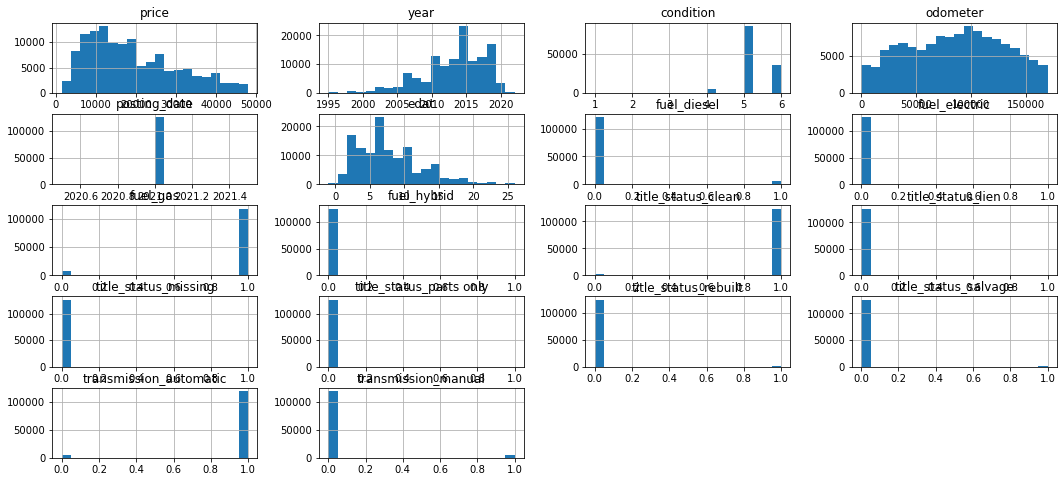

In [112]:
data = data[data['year'] >= 1995 ]
data = data[(data["odometer"] >=0) & (data.odometer <=170000)]
data = data[(data["price"] >=1500) & (data.price <=48000)]


data.hist(figsize=(18, 8), bins=20)

In [113]:
coefficient_corr = data.corr()
print(coefficient_corr["price"].sort_values(ascending=False))

price                      1.000000
year                       0.539916
fuel_diesel                0.279440
title_status_clean         0.055295
transmission_automatic     0.037133
fuel_electric              0.014253
title_status_lien          0.004725
title_status_parts only   -0.002638
title_status_missing      -0.004270
fuel_hybrid               -0.021576
title_status_salvage      -0.032678
transmission_manual       -0.037133
title_status_rebuilt      -0.048370
condition                 -0.118843
fuel_gas                  -0.236463
odometer                  -0.476953
edat                      -0.539916
posting_date                    NaN
Name: price, dtype: float64


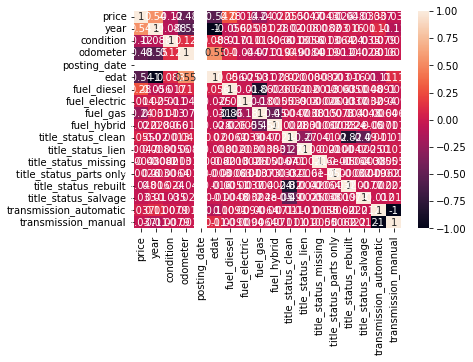

In [114]:
sns.heatmap(coefficient_corr, annot=True)
plt.show()

In [115]:
variant_1 = data[data["ind"] == "v1"]
variant_1 = variant_1.drop(["ind", "cylinders", "VIN", "drive", "paint_color", "geometry"], axis=1)

variant_2 = data[data["ind"] == "v2"]
variant_2 = variant_2.drop(["ind"], axis=1)


In [105]:
variant_1.head()

Empty DataFrame
Columns: [price, year, manufacturer, model, condition, fuel, odometer, title_status, transmission, type, description, posting_date, edat]
Index: []

In [64]:
variant_2.head()

price  year manufacturer                        model  condition fuel  \
202183  33590  2014          gmc     sierra 1500 crew cab slt          5  gas   
202184  22590  2010    chevrolet               silverado 1500          5  gas   
202185  39590  2020    chevrolet          silverado 1500 crew          5  gas   
202186  30990  2017       toyota         tundra double cab sr          5  gas   
202187  27990  2012          gmc  sierra 2500 hd extended cab          5  gas   

        odometer title_status transmission    type  \
202183   57923.0        clean        other  pickup   
202184   71229.0        clean        other  pickup   
202185   19160.0        clean        other  pickup   
202186   41124.0        clean        other  pickup   
202187   68696.0        clean        other  pickup   

                                              description  \
202183  Carvana is the safer way to buy a car During t...   
202184  Carvana is the safer way to buy a car During t...   
202185  Carvana is the safer way to buy a car During t...   
202186  Carvana is the safer way to buy a car During t...   
202187  Carvana is the safer way to buy a car During t...   

                    posting_date cylinders                VIN drive  \
202183  2021-05-04T12:31:18-0500         8  3GTP1VEC4EG551563   4wd   
202184  2021-05-04T12:31:08-0500         8  1GCSCSE06AZ123805   4wd   
202185  2021-05-04T12:31:25-0500         8  3GCPWCED5LG130317   4wd   
202186  2021-05-04T10:41:31-0500         8  5TFRM5F17HX120972   4wd   
202187  2021-05-03T13:41:25-0500         8  1GT220CG8CZ231238   4wd   

       paint_color                    geometry  
202183       white  POINT (-85.48000 32.59000)  
202184        blue  POINT (-85.48000 32.59000)  
202185         red  POINT (-85.48000 32.59000)  
202186         red  POINT (-85.48000 32.59000)  
202187       black  POINT (-85.48000 32.59000)

### 4. Entrenament del model

In [124]:
model = RandomForestRegressor()

In [125]:

#Separem els dos datasets




sc = StandardScaler()



train_set, test_set = train_test_split(variant_2, test_size = 0.1)


y = train_set[["price"]].values.ravel()
x = train_set[["year", "condition", "cylinders", "odometer"]]


y_test = test_set[["price"]]
x_test = test_set[["year", "condition", "cylinders", "odometer"]]
 

model.fit(x, y)

print(model.score(x_test, y_test))

0.7815184189934224


In [ ]:
variant_1.info()